In [1]:
import osmnx as ox
import networkx as nx

In [2]:
graph1 = ox.load_graphml( filename="germany_split_motorway_motorwaylink.graphml")
print ('motorway_motorwaylink loaded')

motorway_motorwaylink loaded


In [3]:
graph2 = ox.load_graphml( filename="germany_split_trunk_trunk_link.graphml")
print ('trunk_trunk_link loaded')

trunk_trunk_link loaded


In [4]:
graph3 = ox.load_graphml( filename="germany_split_primlink.graphml")
print ('primlink loaded')

primlink loaded


In [5]:
graph4 = ox.load_graphml( filename="germany_split_prim.graphml")
print ('prim loaded')

prim loaded


In [6]:
c_graphs = [graph1, graph2, graph3, graph4]
composed_G = nx.compose_all(c_graphs)

print ('composed_G:')
print ("nodes: " + str(len(composed_G.nodes(data=True))))
print ("edges: " + str(len(composed_G.edges(data=True))))
#fig, ax = ox.plot_graph(composed_G)

composed_G:
nodes: 1613199
edges: 2365254


In [7]:
graph1.clear()
graph2.clear()
graph3.clear()
graph4.clear()


print ('input cleared')

input cleared


In [8]:
simp_G = ox.simplify_graph(composed_G)

print ('simp_G:')
print ("nodes: " + str(len(simp_G.nodes(data=True))))
print ("edges: " + str(len(simp_G.edges(data=True))))
#fig, ax = ox.plot_graph(simp_G)

simp_G:
nodes: 90947
edges: 144510


In [9]:
connected_G = max(nx.strongly_connected_component_subgraphs(simp_G), key=len)

print ('connected_G:')
print ("nodes: " + str(len(connected_G.nodes(data=True))))
print ("edges: " + str(len(connected_G.edges(data=True))))
#fig, ax = ox.plot_graph(connected_G)

connected_G:
nodes: 71723
edges: 124528


In [10]:
graph_proj = ox.project_graph(connected_G)
print ('proj done')

proj done


In [11]:
ox.save_graphml(graph_proj, filename="allGermany_allstreetsUntilPrim_proj.graphml")

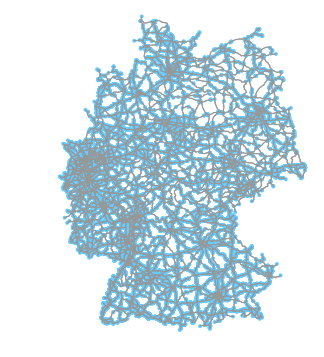

In [12]:
fig, ax = ox.plot_graph(graph_proj)

In [14]:
import pandas as pd
# import geopandas as gpd
# from geopandas import GeoDataFrame
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import osmnx as ox

plz_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/routing/plz_centroide_utm32.csv')
#graph = ox.load_graphml( folder = 'C:/Users/Simon/Desktop/sonstiges/routing/networkx/', filename='network_deutschland_project_undirected.graphml')

#print (plz_df[:20])

for index, row in plz_df.iterrows():
    coord_x= plz_df['X'][index]
    coord_y= plz_df['Y'][index]
    coords = (coord_y, coord_x)
    point = Point(coords)
    
    nearest_node = ox.get_nearest_node(graph_proj, coords, method='euclidean')

#     print (nearest_node)
    
    plz_df.loc[plz_df.index[index], 'nearest_graph-prim_node'] = nearest_node
    
print (plz_df)

plz_df.to_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/plz_centroide_utm32_nearest_graph-prim_node.csv', index=False)

                  X             Y  V_LFD  V_DAT    PLZ  \
0     830542.273549  5.667133e+06     33   1214   1067   
1     832010.317324  5.664958e+06     33   1214   1069   
2     832134.898562  5.668003e+06     33   1214   1097   
3     837556.987061  5.671025e+06     33   1214   1099   
4     834629.417826  5.677657e+06     33   1214   1108   
5     832817.347625  5.673843e+06     33   1214   1109   
6     831371.244492  5.669513e+06     33   1214   1127   
7     830255.782419  5.671207e+06     33   1214   1129   
8     828349.888260  5.669265e+06     33   1214   1139   
9     823688.038027  5.667366e+06     33   1214   1156   
10    826992.619080  5.667341e+06     33   1214   1157   
11    829275.763992  5.665172e+06     33   1214   1159   
12    826971.852149  5.664777e+06     33   1214   1169   
13    829410.126957  5.663324e+06     33   1214   1187   
14    829709.576323  5.661908e+06     33   1214   1189   
15    832578.832957  5.662415e+06     33   1214   1217   
16    834139.5